<font size="4">


# Регрессия 

## Два взгляда на регрессию


### Регрессия в регрессионном анализе


Регрессионный анализ - это процесс установления взаимоотношений между (случайными) переменными. Регрессионный анализ выполняется при помощи построения _регрессионной модели_.

* набор параметров $w$, изначально неизвестный
* целевая случайная переменная $Y$, также называется _зависимой_
* набор независимых переменных $X$, или входные данные модели

Нужно установить зависимость $Y \approx f(X, w)$. Обычно в качестве приближения используется матожидание случайной переменной $Y$ при определенном $X$:

$E(Y|X) = f(X, w)$

### Регрессия и классификация

В машинном обучении задачи часто делят на:

- регрессию - поиск количества чего-либо
- классификацию - прогноз класса (качественной характеристики) 

такое разделение прохо согласуется с определением регрессионного анализа, что мы скоро увидим. Тем не менее, оно есть :)

При том, что ряд методов, которые используют для классификации, фактически относится к регрессии: например, _логистическая регрессия_.

### Ограниченный набор значений - выборка

Регрессионный анализ придумали Лежандр и Гаусс - для определения орбит объектов (комет и малых планет). 

Лежандр первым опубликовал метод, Гаусс и дал методу более строгое обоснование, а так же в процессе придумал нормальное (или Гауссово) распределение:

$\mathcal{N(\mu, \sigma)} = \dfrac{1}{\sqrt{2\pi\sigma^2}} \exp^{\dfrac{-(x - \mu)^2}{2\sigma^2}}$

> В рамках Ньютоновской механики принято считать, что орбиты таких объектов как кометы, определяются "точными" законами физики. При чем тогда регрессионный анализ, случайные переменные?

.  
.  
.  
.  
.  

Астроному известны не все положения объекта, а только ограниченный набор наблюдений с некоторой погрешностью. Набор примеров формирует выборку.

Выборка может быть записана так:

$\mathcal{D} = \{(x_i, y_i)\}$, $x_i \in R^M$, $y_i \in R$

Обычно это пары
- набор параметров (описание объекта) - его тип, характеристика, наличие бинарного признака
- набор параметров (описание объекта) - его параметр (число), например, стоимость, рост, вес и т.д.

> Какими могут быть параметры модели $x_i$?

### Метод наименьших квадратов

Метод базируется на расчете и минимиазции _остатков_ (residuals), или разности между "истинным" значением, т.е. наблюдаемым $y_i$, и набором независимых переменных $x_i$:

$r_i = y_i - f(x, w)$

(здесь и далее $w$ - параметры модели). 

* Можно ли минимизировать сумму остатков?
* Если нет, то что можно минимизировать?

.  
.  
.  
.  
.  

Распространенные варианты - минимизация квадратов остатков:

$S = \sum\limits_{i=1}^{n} r_i^2$

или модулей остатков (разберем этот вопрос позже):

$S = \sum\limits_{i=1}^{n} |r_i|$

В методе наименьших квадратов ищется минимум суммы квадратов $r_i$.

### Выбор модели 

Давайте разбирать модель на каком-то примере. Есть классический датасет - Boston Housing. Модель прогнозирует стоимость жилья (проживания) в зависимости от параметров жилья и социально-демографических параметров района.

> Предположение: стоимость жилья зависит от количества комнат (или квадратных метров). Попробуем сделать простую модель на основе этой зависимотси.

(здесь дробное количество комнат, т.к. измеряется среднее количество комнат на дом)

</font>

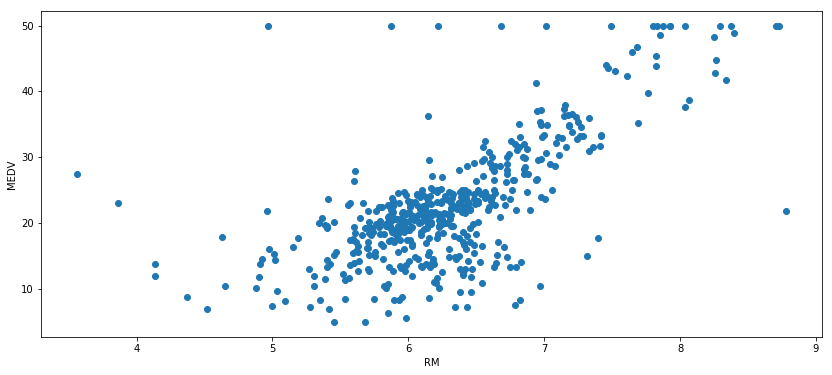

In [123]:
plot_vs_target(boston, 'RM')

<font size="4">

Можно преположить, что функция, которая описывает зависимость стоимость от размера жилья, похожа на линейную (это согласуется с интуитивными представлениями).

$f(x) = b + wx$

> Вопрос: можно ли строить модель вида $f(x) = wx$? Что будет, если модель построить в таком виде?

### Применение метода наименьших квадратов 

Как применить метод наименьших квадратов? Как найти потимальное решение?

Есть два способа: точный и итеративный. Точный работает только в случае линейной регрессии, итеративный (градиентный спуск) - и для других, более сложных моделей.

Для начала _упростим_ задачу - нормальизуем данные. Один из распространенных видов нормализации - вычитание среднего значения и деление на стандартное отклонение:

$x_{i_{norm}} = \dfrac{x_i - \mu}{\sigma}$

</font>

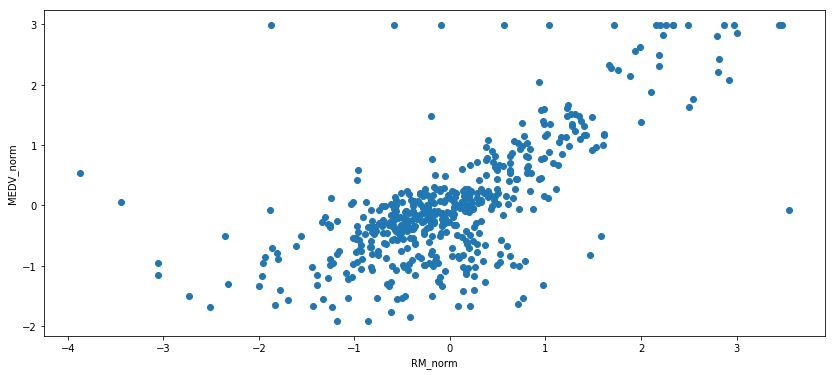

In [124]:
plot_vs_target(boston, 'RM_norm', 'MEDV_norm')

<font size="4">

Какие плюсы у такого представления данных?

https://stats.stackexchange.com/questions/43036/why-does-the-y-intercept-of-a-linear-model-disappear-when-i-standardize-variable

Можно отказаться от $b$ - сдвига! Это упрощает модель.

### Поиск минимума


Как найти минимум $S = \sum\limits_{i=1}^{n} r_i^2$?

> Как найти экстремум функции $f(x)$?

.  
.  
.  
.  
.  

найти точку $\dfrac{\delta f(x)}{\delta x} = 0$

**Минимум _относительно параметров_ w**

$S = \sum\limits_{i=1}^{n} r_i^2 = \sum\limits_{i=1}^{n} (y - f(x, w))^2 $

тогда для поиска "оптимальных" параметров $w$ нужно решить уравнение

 $\dfrac{\delta \sum\limits_{i=1}^{n} (y - f(x, w))^2 }{\delta w} = 0$
 
 Упрощая, нужно "раскрыть" $(y - f(x, w))^2$: выбросить часть $y$ и подставить базовую модель:
 
 
$\sum\limits_{i=1}^{n}\dfrac{\delta  (y_i - f(x_i, w))^2 }{\delta w}$   
$= \sum\limits_{i=1}^{n} \dfrac{\delta y_i^2 - 2 y_i \cdot f(x_i, w)) + f(x_i, w)^2 }{\delta w}$  
$= \sum\limits_{i=1}^{n} \bigg( 2f(w,x_i) \dfrac{\delta f(w,x_i) }{\delta w} - 2y_i\dfrac{\delta f(x_i, w)}{w} \bigg)$   
$= \sum\limits_{i=1}^{n} \bigg( 2\dfrac{\delta f(x_i, w)}{w}\Bigg(f(w,x_i) - y_i\Bigg) \bigg)$ - двойку можно выбросить

Заменим $f(w, x)$ на $wx$:  
$\sum\limits_{i=1}^{n} \bigg( 2\dfrac{\delta f(x_i, w)}{w}\Bigg(f(w,x_i) - y_i\Bigg) \bigg)$
$= \sum\limits_{i=1}^{n} \bigg( 2x_i \Bigg(wx_i - y_i\Bigg) \bigg)$

Вспоминая, что $S = 0$, получим:

$\sum\limits_{i=1}^{n} \bigg( x_i \Bigg(wx_i - y_i\Bigg) \bigg) = 0$


$\sum\limits_{i=1}^{n} y_i x_i = \sum\limits_{i=1}^{n} wx_i^2$

$w = \dfrac{\sum\limits_{i=1}^{n} y_i x_i}{\sum\limits_{i=1}^{n} x_i^2}$


### Давайте проведем эту линию!

</font>

In [453]:
w 

0.6953599470715393

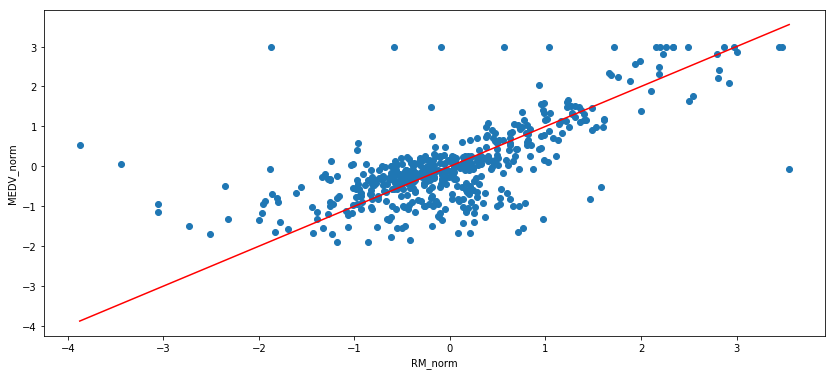

In [126]:
plot_line(boston, col='RM_norm', target='MEDV_norm')

<font size="4">

> Можно сделать обратное преобразование, чтобы линия проходила через изначальные (ненормализованные) данные. Как изменить функцию $f(x)$: $y^{'} = w^{'}x^{x}$? При этом $y_i^{'} = \dfrac{y - \mu_y}{\sigma_y}$ и $x_i^{'} = \dfrac{x - \mu_x}{\sigma_x}$? 

.  
.  
.  
.  
.  

Можно вывести параметры $w, b$:

$y = \sigma_y y^{'} + \mu_y$

$y = \sigma_y w^{'} \bigg( \dfrac{x - \mu_x}{\sigma_x} \bigg) + \mu_y$

$y = \dfrac{\sigma_y}{\sigma_x}w^{'}x + \bigg(\mu_y - \dfrac{\sigma_y \mu_x w^{'}}{\sigma_x} \bigg)$

Сами параметры:

$w = \dfrac{\sigma_y}{\sigma_x}w^{'}$

$b = \mu_y - \dfrac{\sigma_y \mu_x w^{'}}{\sigma_x}$


### И график:

</font>

b = -59.73167747518998, w = 13.089780364131144


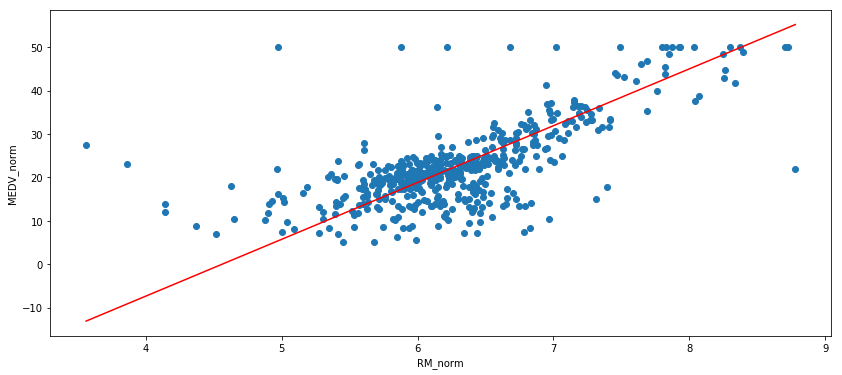

In [591]:
plot_line_original_data(boston, 'RM_norm', 'MEDV_norm')

<font size="4">

## Важные вопросы

* Что делать, если параметров $x$ больше одного (т.е. x - это вектор)?
* "Какими" могут быть $x$? Например, $\sin{x}$, $x^2$, $e^{x}$ и т.д.?
* Как оптимизировать $f(x, w)$ в таком случае?

### Если x - это вектор

Если $x$ - вектор, то и $w$ - вектор.

Для простоты вывода обучающие примеры и целевые значения записывают в векторной форме:

$X \in R^{n \times k}$ - матрица $X$ из $n$ обучающих примеров с $k$ признаками, $y \in R^{n}$ - вектор целевых переменных.

Тогда модель можно записать как

$y = Xw$

А оптимальный набор параметров можно получить, рассчитав значение выражения

$w = (X^T X)^{-1} X^Ty$,

[Вывод формулы (на английском)](https://towardsdatascience.com/analytical-solution-of-linear-regression-a0e870b038d5)


### Как можно модифицировать данные?

Для начала давайте посмотрим на график потенциала $L = (y - f(x, w))^2$ для функции $f(x) = 0.695 \cdot x$

</font>

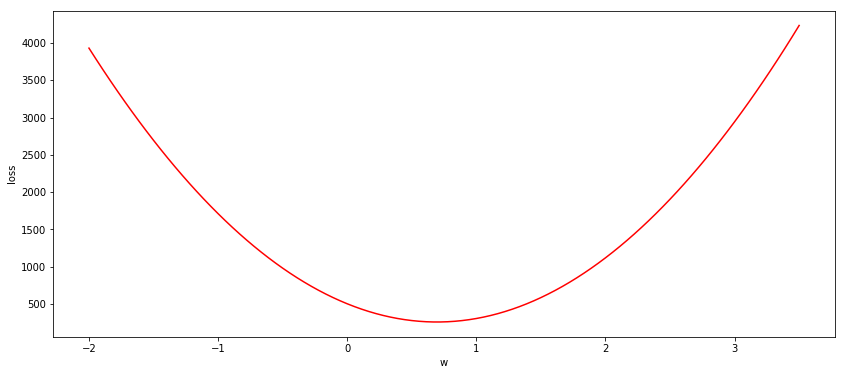

In [117]:
plot_potential(boston, lambda x, w: w * x, 'RM_norm', 'MEDV_norm')

<font size="4">

На этом графике _1_ глобальный минимум (который мы можем найти, приравнивая производную от суммы остатков к нулю).

Но что, если модель подразумевает более сложную зависимость целевой переменной от данных, например, 

$y = w \sin {x} + w x^2$?

</font>

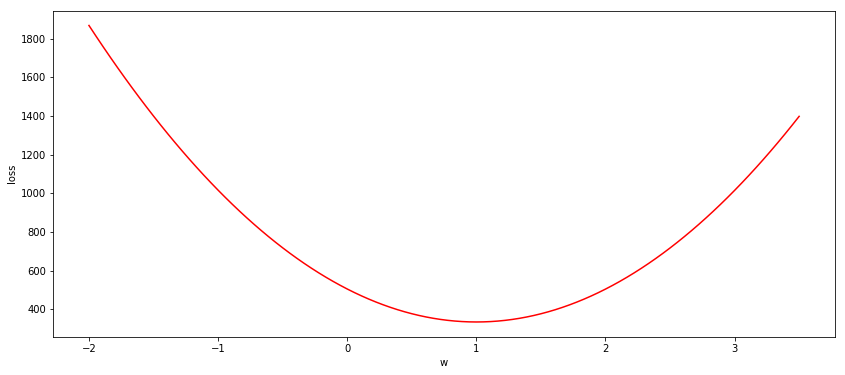

In [121]:
plot_potential(boston, (lambda x, w: w * (np.sin(x))), 'RM_norm', 'MEDV_norm')

<font size="4">

Пока модель _линейна относительно параметров w_, при использовании подходящей функции ошибки (такой, как разность квадратов, squared error), мы будем получать выпуклую функцию ошибки с одним глобальным минимумом.

Однако поиск точного решения значиьтельно усложняется. Кроме того, поиск решения по формуле $w = (X^TX)^{-1}X^Ty$ - очень вычислительно дорог (матричные умножения, поиск обратной матрицы - $O(n^3)$. 

Поэтому оптимальные параметры (те значения, при которых достигается минимальное значение функции ошибки) ищут при помощи градиентного спуска.

## Градиентный спуск

Вычисляя градиент, то есть направление, в котором надо двигаться, можно за некоторое число шагов спуститься "на дно" - в глобальный минимум (если функция выпуклая).

> В случае невыпуклой функции, при более сложной зависимости, можно попасть не в глобальный минимум, а в один из локальных - то есть найти неоптимальное решение.
 
<img src="files/gds.png">

### Как работает градиентный спуск

Давайте введем обобщенную форму записи функций ошибки (в дальнейшем понадобится другие функции), будем обозначать функцию ошибки как $\mathcal{L}(y_{true}, y_{predicted})$.

$\mathcal{L}_{squared\ error} = \sum\limits_{i=0}^{n}(y_{true} - y_{predicted})^2$

и более распространенная MSE, с усреднением:

$\mathcal{L}_{mean\ squared\ error} = \dfrac{1}{n}\sum\limits_{i=0}^{n}(y_{true} - y_{predicted})^2$


### Оператор ∇

<img src="files/gradient.png">


Что такое оператор $\nabla$, и что такое градиент функции?

Градиент - это вектор, компоненты которого - это частные производные функции. При этом градиент "указывает" направление наиболее крутого подъема в данной точке.

На примере декартовых координат, "обычной" функции в трехмерном пространстве:

$\nabla f(x, y, z) = \dfrac{\delta f(x, y, z)}{\delta x} \textbf{i} +
\dfrac{\delta f(x, y, z)}{\delta y} \textbf{j} + 
\dfrac{\delta f(x, y, z)}{\delta z} \textbf{k}$

Где $
\begin{align}
i &= \begin{bmatrix}
           1 \\
           0 \\
           0
         \end{bmatrix}
  \end{align}
$, $
\begin{align}
j &= \begin{bmatrix}
           0 \\
           1 \\
           0
         \end{bmatrix}
  \end{align}
$, $
\begin{align}
k &= \begin{bmatrix}
           0 \\
           0 \\
           1
         \end{bmatrix}
  \end{align}
$

В $k$-мерном случае можно записать выражение так:  
$
\begin{align}
\nabla f(\textbf{w}) &= \begin{bmatrix}
           \dfrac{\delta f(\textbf{w})}{w_1} \\
           \dfrac{\delta f(\textbf{w})}{w_2} \\
           \vdots \\
           \dfrac{\delta f(\textbf{w})}{w_k}
         \end{bmatrix}
  \end{align}
$

Если $f(\textbf{w})$ линейна относительно $w_j$, т.е. функцию фожно записать как

$f(w) = w_1\alpha + w_2\beta + ... + w_k\xi$,   
$
\begin{align}
\nabla f(\textbf{w}) &= \begin{bmatrix}
           \alpha \\
           \beta \\
           \vdots \\
           \xi
         \end{bmatrix}
  \end{align}
$

В случае линейной регрессии функции, зависящие от $x_j$, например, $x_j$, $x_j^k$, $e^x$, $\cos{x}$ etc. являются просто коэффициентами ~ $\alpha, \beta, \gamma, ...$ - так как дифференцируем по $w_j$, а не по $x_j$.


$f(w) = w_1 x_1 + w_2 x_2^3 + ... + w_k \cos{x_k}$,   
$
\begin{align}
\nabla f(\textbf{w}) &= \begin{bmatrix}
           x_1 \\
           x_2^3 \\
           \vdots \\
           \cos{x_k}
         \end{bmatrix}
  \end{align}
$

Давайте применим $\nabla$ к функции ошибки MSE: $\nabla{\sum\limits_{1}^n (y_i - f(\textbf{x}_i, \textbf{w}_i))^2}
$

$\nabla{\sum\limits_{i=1}^n (y_i - f(\textbf{x}_i, \textbf{w}_i))^2}$  
$= \sum\limits_{i=1}^n \nabla{(y_i - f(\textbf{x}_i, \textbf{w}_i))^2}$  
$= \sum\limits_{i=1}^n 2(y_i - f(\textbf{x}_i, \textbf{w}_i)) \cdot \nabla{(y_i - f(\textbf{x}_i, \textbf{w}_i))}$  
$= \sum\limits_{i=1}^n 2(y_i - f(\textbf{x}_i, \textbf{w}_i)) \cdot \nabla{f(\textbf{x}_i, \textbf{w}_i)} 
$

Здесь $y_i - f(\textbf{x}_i, \textbf{w}_i)$ - скаляр, $\nabla{f(\textbf{x}_i, \textbf{w}_i)}$ - вектор-столбец размерности $k$:

$
\begin{align}
\nabla f(\textbf{x}_i, \textbf{w}_i) &= \begin{bmatrix}
           f_1(x_1) \\
           f_2(x_2) \\
           \vdots \\
           f_k(x_k)
         \end{bmatrix}
  \end{align}
$


### Алгоритм градиентного спуска

Градиент записывается как $\nabla_w \mathcal{L}(y, f(x, w))$. А сам алгоритм градиентного спуска в простейшей модификации состоит в повторении шагов по градиенту: 


**_Пока не будет выполнено условие остановки, повторять_:**  
$ \ \ \ \ \ \ \ \ \ \textbf{w}_{n+1} = \textbf{w}_n - \gamma \nabla_w \mathcal{L}\textbf{(y, f(x, w))} $


Подкупающе просто!

**Возможные условия остановки:**

* Сделано определенное количество итераций
* Ошибка _не уменьшается_ (или уменьшается незначительно) несколько итераций
* Шаг спуска меньше некоторой величины


### Возможные сложности
* "Застревание" в локальном минимуме (неактуально для линейной регрессии)
* Застревание на плато
* Подбор шага
  - слишком маленький шаг - слишком долгая работа
  - слишком большой шаг - начнется расхождение спуска ("прыжки" с одной стороны на другую)
* Движение от склона к склону - как сноубордист в трубе. Медленное приближение к минимуму

Разберем на следующем занятии: 

**Локальный минимум, плато**
<img src="files/local_minima.png">


**Зигзаг**
<img src="files/gs_zig_zag.png">


**Неправильный шаг**
<img src="files/lr.png">

**Что делать?**
* Подбирать вручную
* Использовать улучшенные версии градиентного спуска


### Переобучение

(Не в смысле "обучение заново", а в смысле "так хорошо, что даже плохо".)

Почему нельзя взять _очень сложную_ функцию, которая позволяет с достаточно хорошей точностью описать описать любую зависимость, и обучить регрессионную модель?



Например, 

$f(\textbf{x}, \textbf{w}) = w_1 x + w_2 x^2 + .... + \sin{x} + \sin{x}^2 + .... + \log{x} + \log{x}^2 ...$ и так далее?

.  
.  
.  
.  
.  
.  
.  
.  
.  
.  

Получается _переобучение_:

<img src="files/overfitting_1.png">

**Важные вопросы**
* В чем проблема переобучения?
* Как распознать, что модель переобучилась?
* Что делать, чтобы не переобучаться?


### Проблема переобучения

Основная проблема - слабая _генерализация_ модели, т.е. способность модели работать с новыми, "еще не виденными" примерами. Ошибка модели на таких примерах может быть огромной, хотя на _обучающей_ выборке она была небольшой (близкой к нулю, например).

Прямое следствие - модель нельзя использовать по прямому назначению, для прогнозирования на новых данных.

Логичный (хотя и недостаточно строгий и последовательный) способ - разделять данные на часть "для обучения" и часть "для проверки" и после обучения модели проверять, насколько хуже результаты на тестовой выборке.


<img src="files/tts.png">

**Формирование сплита**

* Данные выбираются случайным образом, обычно при помощи перемешивания и последуюшего разделения
* Если речь идет о классификации (пояснения далее), применяется выполняется stratified split - данные равномерно разбиваются по классам
* Обычно в train идет 70-80% данных, в test - 20-30%

В дальнейшем проверка качества модели идет одновременно на обучающей и тестовой выборках. Если качество на тестовой выборке начинает падать, а на обучающей продолжает расти (значечние ошибки понижается) - то пора остановиться.

Это так называемый early stopping (вспомните возможные условия остановки) - ранняя остановка.

Т.е. "в норме" обучение идет заданное количество итераций, но если модель показывает склонность к переобучению, включается механизм "ранней остановки".

<img src="files/es.png" width="600">

### Переобучение на практике


</font>

MSE
 cv train=8.790263059765143e-30, cv test=9.554568841630228e-30


ValueError: shape mismatch: objects cannot be broadcast to a single shape

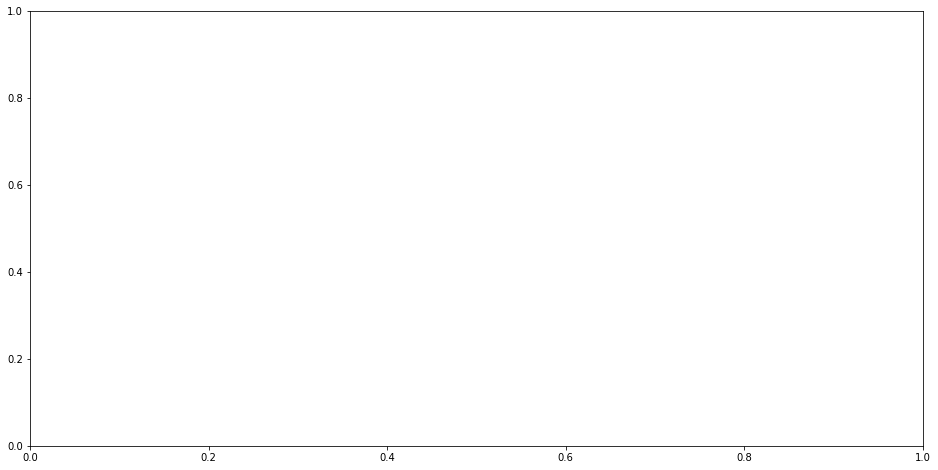

In [593]:
boston_train, boston_test = train_test_split(boston, test_size=0.3)

model = fit_model(boston_train, boston_test)

<font size="4">

**Вывод**

Выборка небольшая, как валидировать качество модели? Очень сильный разброс.

> Много раз повторять обучение на разных подвыборках?

### Кросс-валидация


* Разделение обучающих данных на k подвыборок, обучение модели на k-1 подвыборок и тестирование на одной k раз  
* Усреднение результата
* Leave-one-out: каждый раз удаляется 1 образец из обучающей выборки, проводится обучение и тест на 1 образце


<img src="files/grid_search_cross_validation.png" width=700>

</font>

MSE
 cv=0.5206629285800578


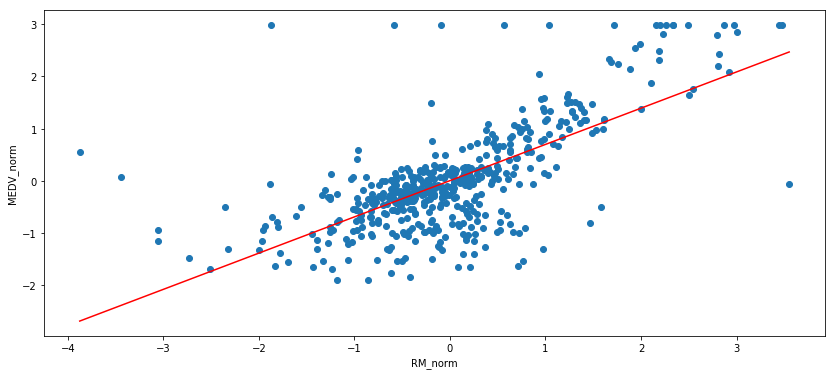

In [295]:
models, error = fit_cv(boston)

<font size="4">

> Выполнив leave-one-out, мы оценили качество модели. Теперь у нас есть отлаженный инструмент для оценки качества, и можно разобраться с проблемой переобучения.

### Демонстрация переобучения 


Модель $f(x) = wx$ более-менне не склонна к переобучению и обладает каким-то качеством (кажется, не очень хорошим).

Попробуем улучшить качество при помощи более сложной модели и не переобучиться!

$f(\textbf{w}) = w_0x^{-1} +  w_1x +  w_2x^2 +  w_3x^3 +  w_4x^4 +  w_5x^5 + ... + w_kx^k$

</font>

MSE
 cv train=0.40708119360364453, cv test=0.7969142000190976


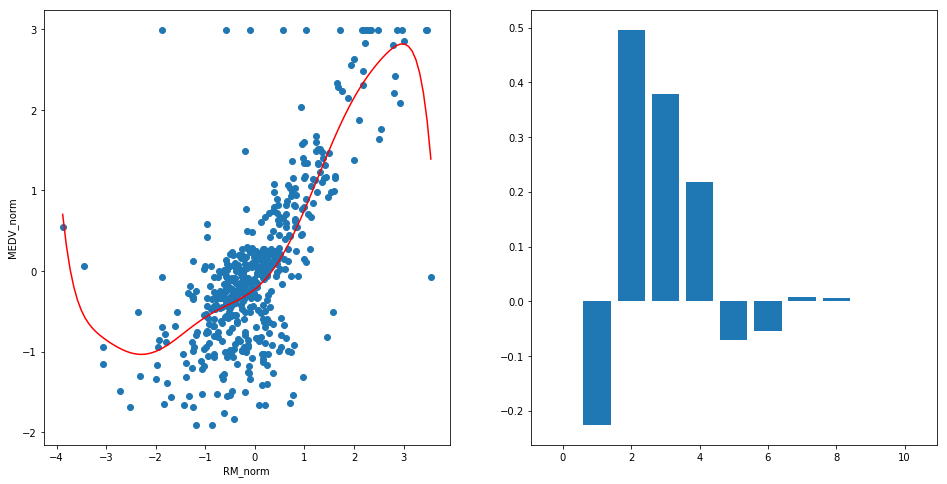

In [425]:
models, errs = overfit_cv(boston, range(-1, 10))

MSE
 cv train=0.9272118617168842, cv test=1.2437698834412647e+27


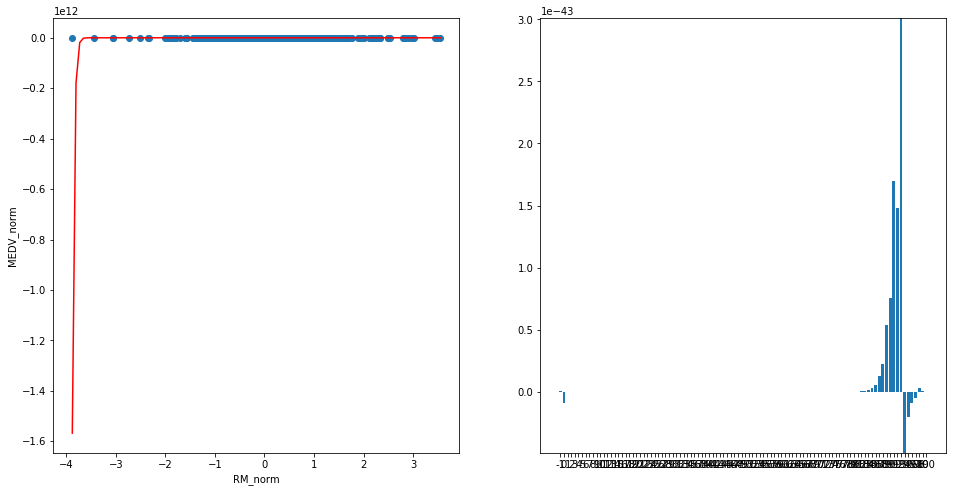

In [595]:
models, errs = overfit_cv(boston, range(-1, 101))

MSE
 cv train=0.4260421822211349, cv test=0.4595307578583936


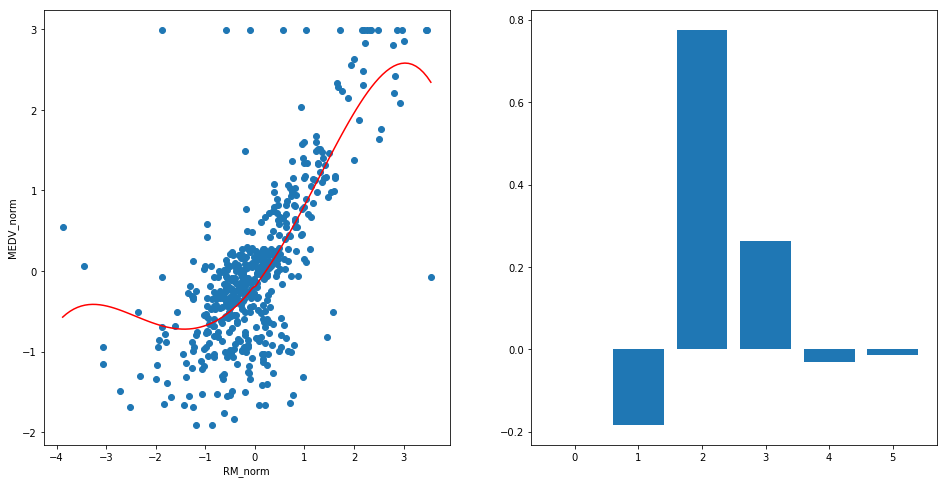

In [427]:
models, errs = overfit_cv(boston, range(-1, 5))

> Вполне в порядке, ошибка меньше чем у "базовой" модели.

<font size="4">

### Способы борьбы с переобучением

* Брать модель попроще
* Выполнять _регуляризацию_ модели

**Регуляризация - добавление к функции ошибки терма, зависящего от весов модели**

В чем идея: модели (как правило) нужно подбирать _большИе_ значения весов, чтобы переобучиться. Регуляризация накладывает ограничения на эти веса.

Из распространенных видов - $l1$-norm (ridge) и $l2$-norm (lasso), l1+l2 (elastic net). 


### l1 norm

**lasso**

По большей части нужна не для регуляризации (все же), а для подбора параметров - feature selection (т.е. тех термов модели или особенностей данных, которые важны. L1 склонна "занулять" коэффициенты менее важных параметров.

$\mathcal{L}_{l1}(y, f(x, w)) = \mathcal{L}(y, f(x, w)) + \lambda \sum\limits_{i=1}^{k} |w_i|$

$\lambda$ - коэффициент регуляризации (реже - $\alpha$) - степень того, как сильно "зарегуляризована" модель

[Почему это работает](https://stats.stackexchange.com/questions/74542/why-does-the-lasso-provide-variable-selection)

### l2 norm

**ridge**

Регуляризация - пока сам коэффициент растет линейно, "штраф" за него растет квадратично, что способствует более равномерному распределению весов. 

$\mathcal{L}_{l2}(y, f(x, w)) = \mathcal{L}(y, f(x, w)) + \lambda \sum\limits_{i=1}^{k} w_i^2$


### l1 + l2 ккомбо

**elastic net**

Пытается совместить плюсы двух подходов, т.е. регуляризацию и "обнуление" менее важныых признаков (что позволит их выбросить).

$\mathcal{L}_{l1 + l2}(y, f(x, w)) = \mathcal{L}(y, f(x, w)) + \lambda \eta \sum\limits_{i=1}^{k} |w_i| + \lambda \dfrac{1 - \eta}{2} \sum\limits_{i=1}^{k} w_i^2$ 


### На примере 

</font>

MSE
 cv train=0.3849860028782404, cv test=1473.2226061426818


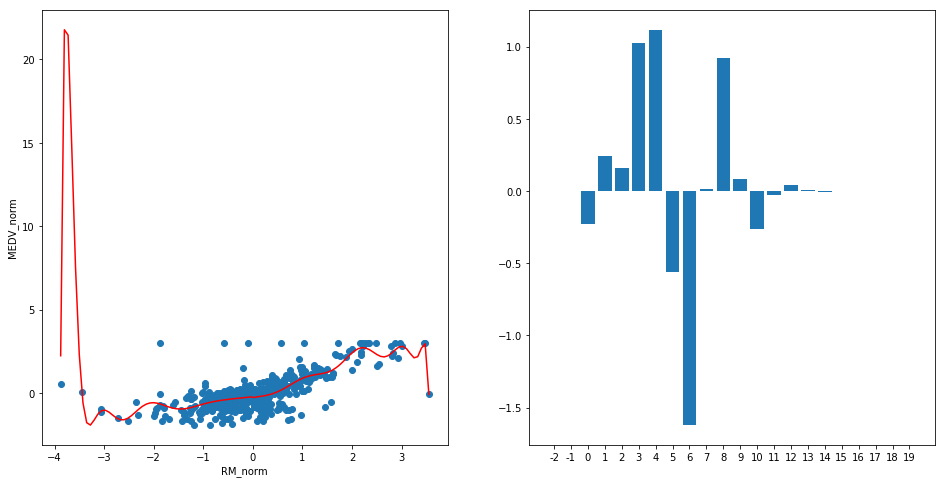

In [454]:
models, errs = overfit_cv(boston, range(-2, 20), lambda: LinearRegression(fit_intercept=False))

MSE
 cv train=0.4520739947326632, cv test=1.1548144954970523


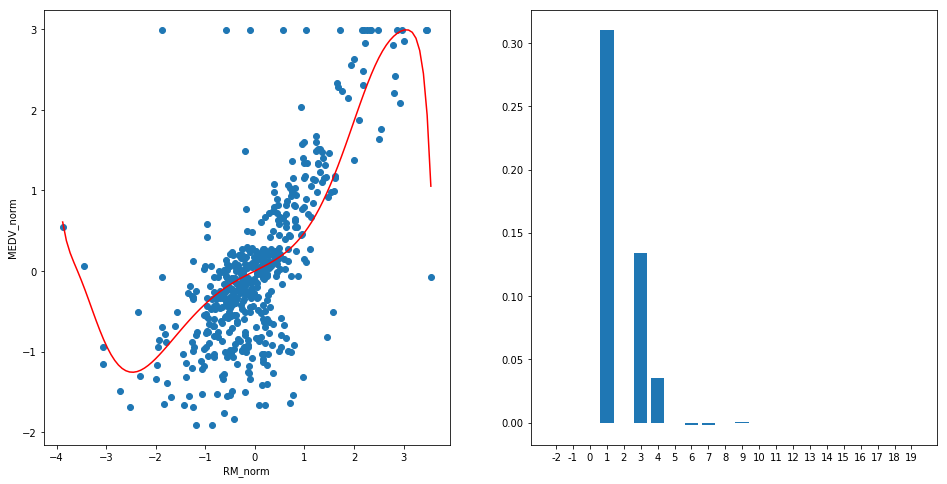

In [455]:
models, errs = overfit_cv(boston, range(-2, 20), lambda: Lasso(alpha=0.1, fit_intercept=False))

MSE
 cv train=0.7262421360108668, cv test=557.6102387263912


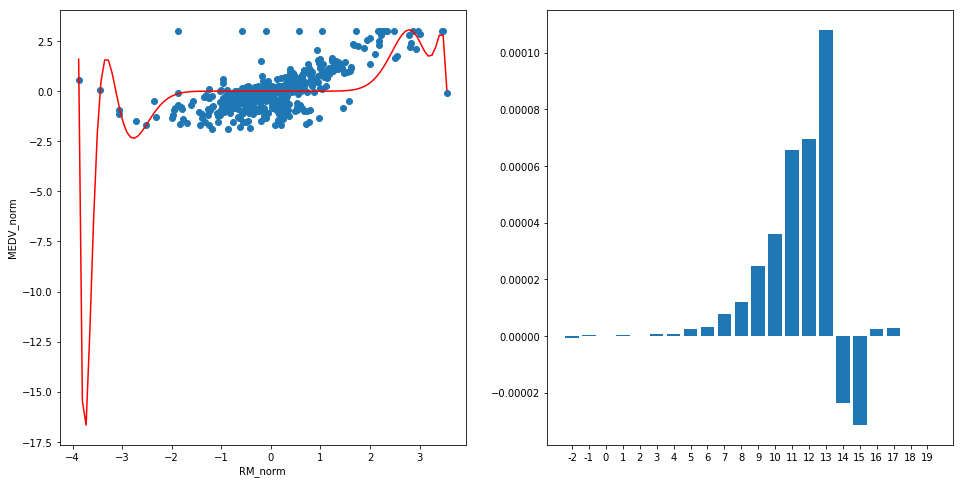

In [599]:
models, errs = overfit_cv(boston, range(-2, 20), lambda: Ridge(alpha=500000000, fit_intercept=False))

MSE
 cv train=0.6266926265304574, cv test=1.050093674315025


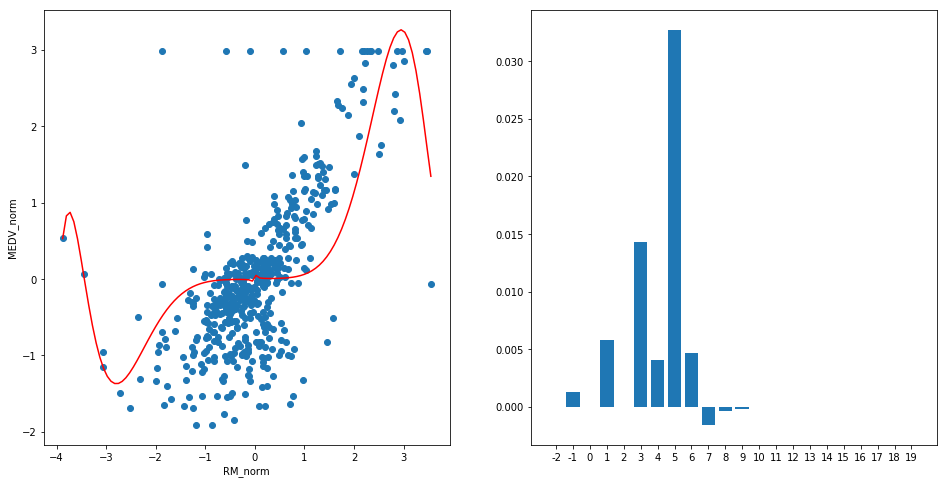

In [600]:
models, errs = overfit_cv(boston, range(-2, 20),
                          lambda: ElasticNet(alpha=20, l1_ratio=0.01, fit_intercept=False))

### Удаление фичей

MSE
 cv train=0.7551210228890534, cv test=0.800569641957121


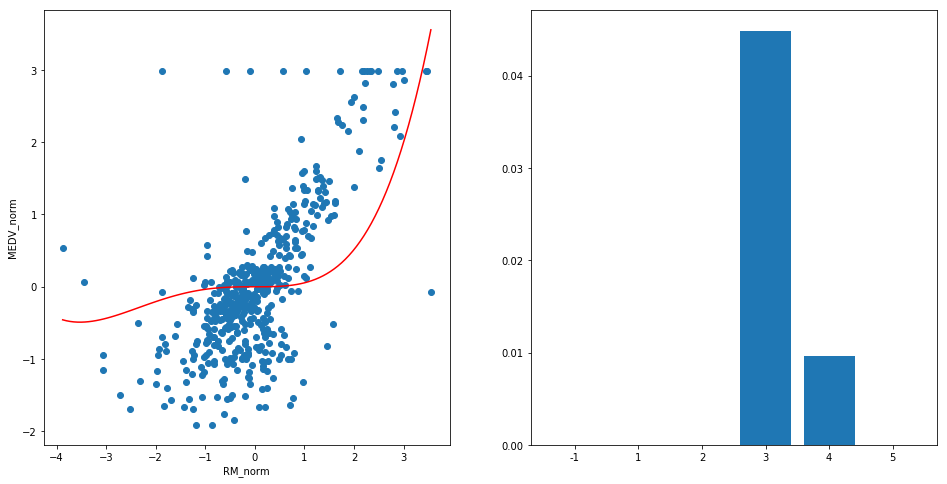

In [458]:
models, errs = overfit_cv(boston,
                          [-1, 1, 2, 3, 4, 5], 
                          lambda: Lasso(alpha=1, fit_intercept=False))

MSE
 cv train=0.464690894852186, cv test=0.5126042025758687


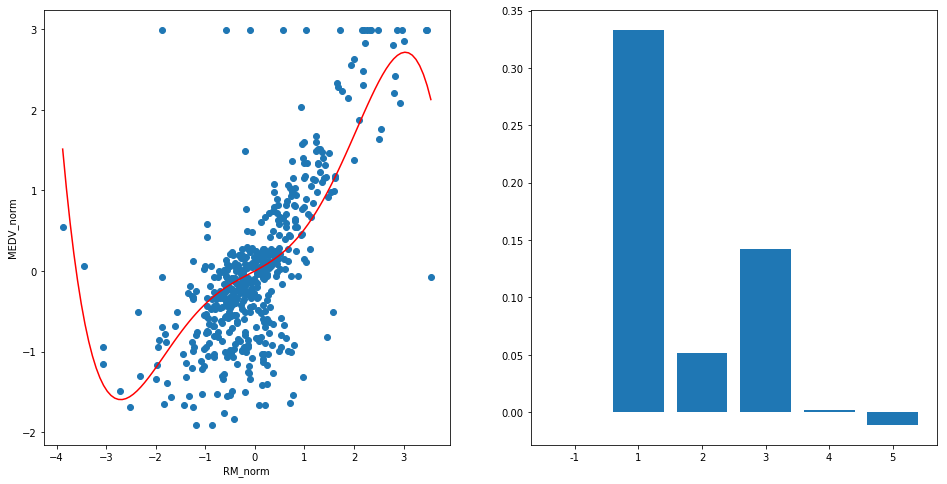

In [459]:
models, errs = overfit_cv(boston,
                          [-1, 1, 2, 3, 4, 5], 
                          lambda: Lasso(alpha=0.1, fit_intercept=False))

### Лучше начинать с разумного набора и применять l1 с этого места

In [460]:
powers = [-1, 1, 2, 3, 4, 5, 6, 7, 8]

MSE
 cv train=0.4301797589602304, cv test=0.4636358870530766


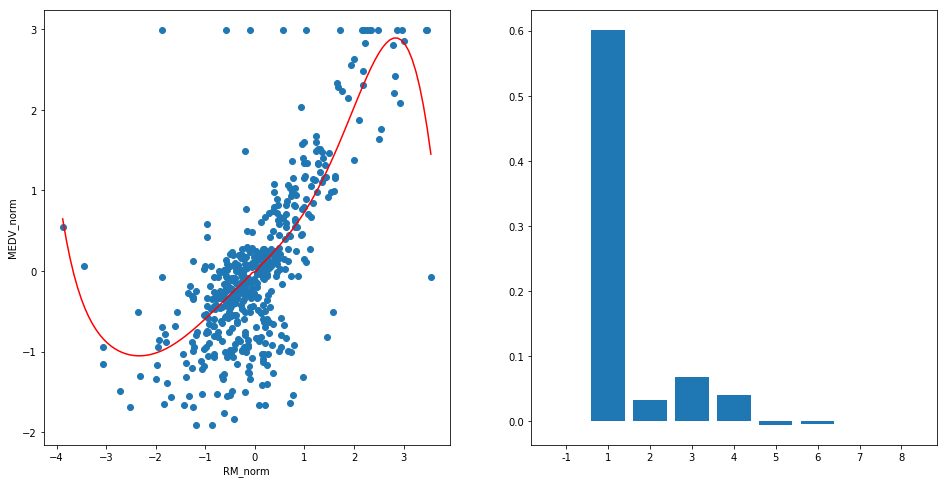

In [601]:
models, errs = overfit_cv(boston,
                          powers, 
                          lambda: Lasso(alpha=0.01, fit_intercept=False))

MSE
 cv train=0.5357380031358359, cv test=0.6690227736790656


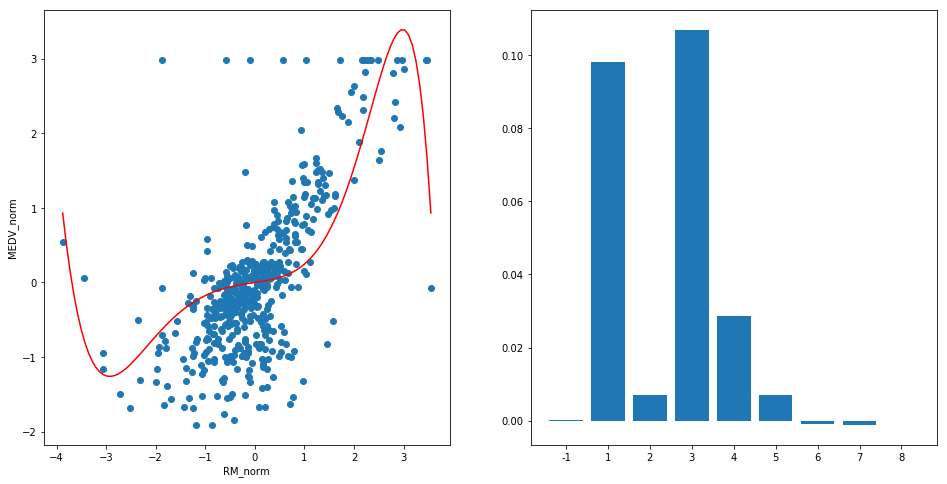

In [462]:
models, errs = overfit_cv(boston,
                          powers, 
                          lambda: ElasticNet(alpha=2, l1_ratio=0.01, fit_intercept=False))

MSE
 cv train=0.43253451751193495, cv test=0.45177295513029936


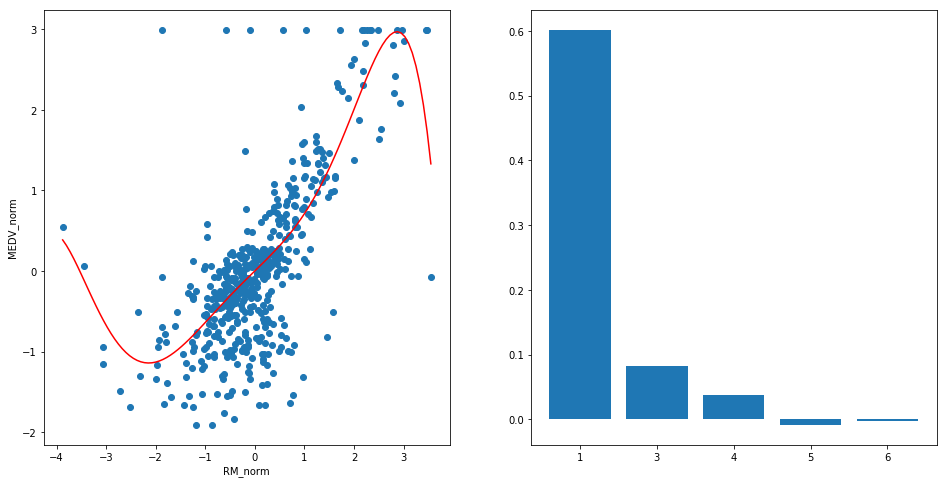

In [448]:
models, errs = overfit_cv(boston,
                          [1, 3, 4, 5, 6], 
                          lambda: Ridge(alpha=1, fit_intercept=False))

### Результаты

Лучше всего показала себя модель

$f(x, \textbf{w}) = w_1x + w_2x^3 + w3x^4 + w_4x^5 + w_5x^6$

## Больше данных - лучше результат



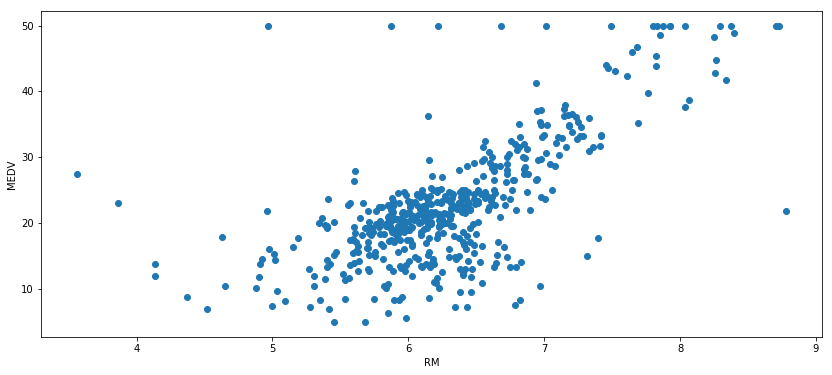

In [474]:
plot_vs_target(boston, 'RM')

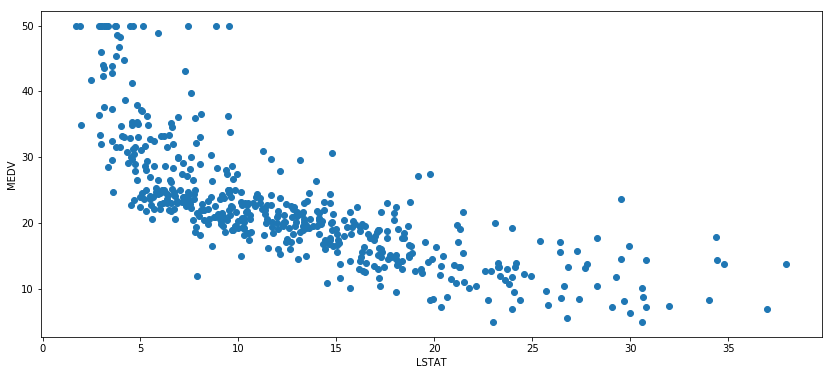

In [475]:
plot_vs_target(boston, 'LSTAT')

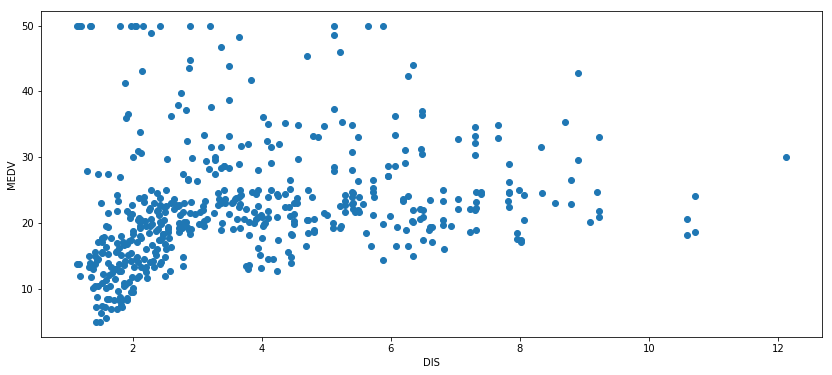

In [478]:
plot_vs_target(boston, 'DIS')

<font size="4">


### Генерация фичей

Сгенерируем больше признаков.

Возьмем три колонки:

* RM - среднее количество комнат в домах поблизости
* LSTAT - количество людей с низким достатком в районе
* DIS - взвешенные расстояния до центров занятости в Бостоне

И набор функций:

* $f(x) = ln(x + 1)$
* $f(x) = 1 / x$
* $f(x) = x^i$ для $i \in \{1..4\}$ 
* $\sin{x}, \cos{x}$

Нормализуем признаки: $x^{'}_i = \dfrac{x_i - \mu_x}{\sigma_x}$

И построим набор данных, применив каждую функцию к каждому признаку:

<pre>

GenerateFeatures(features, functions):
1  output_feautres = <b>new</b> List
2  for fearure in features:
3      for fn in functions:
4          output_feautres.append(fn(feature))
5  <b>return</b> output_feautres

</pre>

</font>

In [602]:
df = generate_features(boston,
                  feature_cols=['RM', 'LSTAT', 'DIS'], 
                  terms=[lambda x: np.log(x + 1), lambda x: 1/x, lambda x: x, lambda x: x**2, 
                   lambda x: x**3, lambda x: x**4, lambda x: np.sin(x), lambda x: np.cos(x)
                  ],
                  term_names=['ln_1', '-1', 'lin', 'square', 'cube', '4th', 'sin', 'cos']
                 )

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until


In [603]:
df['MEDV_norm'] = boston['MEDV_norm']

### Фильтрация фичей при помощи l1, регуляризация l2

MSE
 cv train=0.5214317078907446, cv test=0.5498201097411581


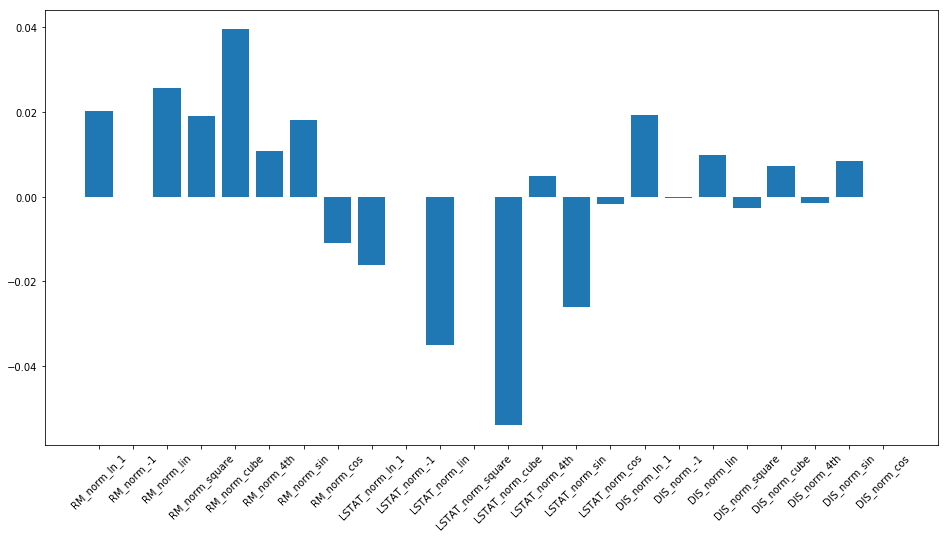

In [604]:
models, err, weigths = fit_model(df, df.columns[:-1], lambda: ElasticNet(alpha=10, l1_ratio=0.002, fit_intercept=False))

MSE
 cv train=0.3384072562387766, cv test=0.3668811076307735


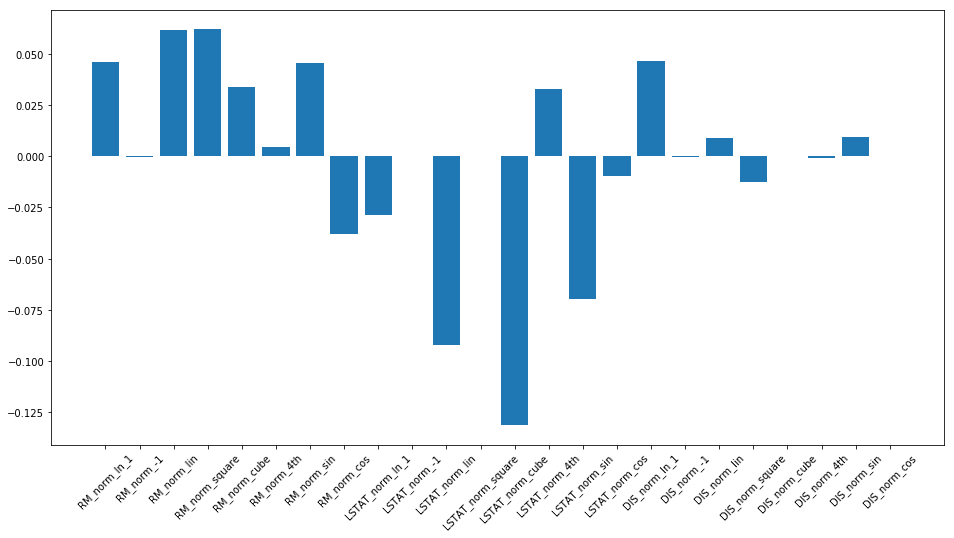

In [605]:
models, err, weights = fit_model(df, df.columns[:-1], lambda: ElasticNet(alpha=2, l1_ratio=0.01, fit_intercept=False))

MSE
 cv train=0.20653725234198986, cv test=0.24319990782914092


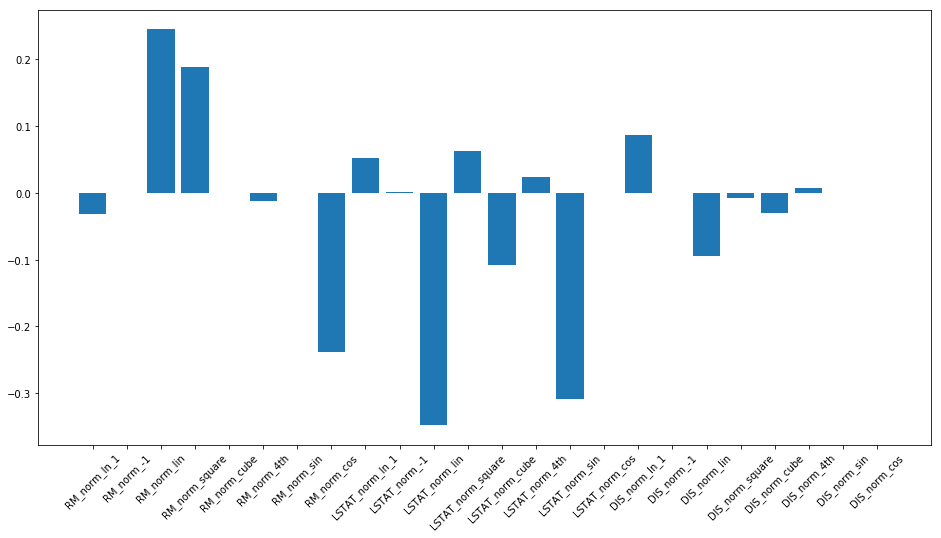

In [581]:
models, err, weights = fit_model(df, 
                                 df.columns[:-1], 
                                 lambda: ElasticNet(alpha=0.01, l1_ratio=0.5, fit_intercept=False))

In [582]:
features = [k for k, v in weights.items() if np.abs(v) > 0.01]

### Эти фичи выглядят значимыми, обучим модель на них

In [583]:
features

['RM_norm_ln_1',
 'RM_norm_lin',
 'RM_norm_square',
 'RM_norm_4th',
 'RM_norm_cos',
 'LSTAT_norm_ln_1',
 'LSTAT_norm_lin',
 'LSTAT_norm_square',
 'LSTAT_norm_cube',
 'LSTAT_norm_4th',
 'LSTAT_norm_sin',
 'DIS_norm_ln_1',
 'DIS_norm_lin',
 'DIS_norm_cube']

MSE
 cv train=0.2054247664050839, cv test=0.22752163124145483


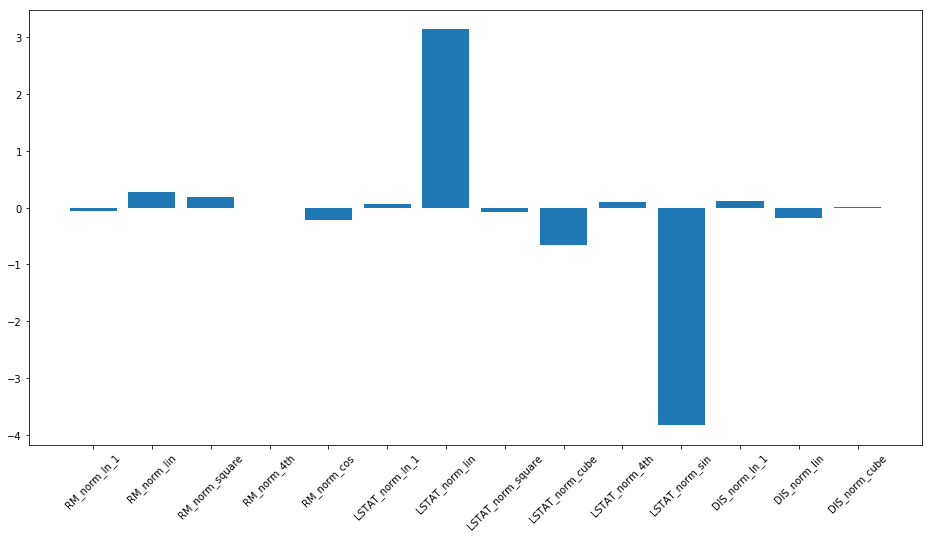

In [584]:
models_sel, err_sel, weights_sel = fit_model(df[features + ['MEDV_norm']], 
                        features, 
                        lambda: Ridge(alpha=0.001, fit_intercept=False))

### Странно, может быть, что-то не так с синусом?

In [585]:
features_no_sin = ['RM_norm_ln_1',
 'RM_norm_lin',
 'RM_norm_square',
 'RM_norm_cos',
 'LSTAT_norm_ln_1',
 'LSTAT_norm_lin',
 'LSTAT_norm_square',
 'LSTAT_norm_cube',
 'LSTAT_norm_4th',
 'DIS_norm_ln_1',
 'DIS_norm_lin',
 'DIS_norm_cube']

MSE
 cv train=0.21475730059568643, cv test=0.23111423595163924


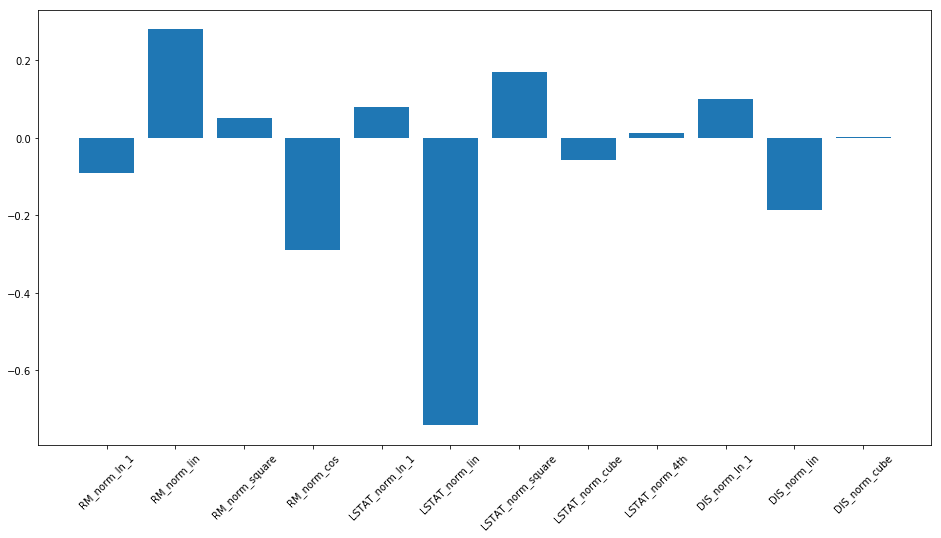

In [586]:
_ = fit_model(df[features_no_sin + ['MEDV_norm']], 
                        features_no_sin, 
                        lambda: Ridge(alpha=0.001, fit_intercept=False))

<font size="4">

### Качество упало, графики функции выглядят так:

Возможно, помогла "нормализация" в $[0, 1]$, или еще что-то
</font>

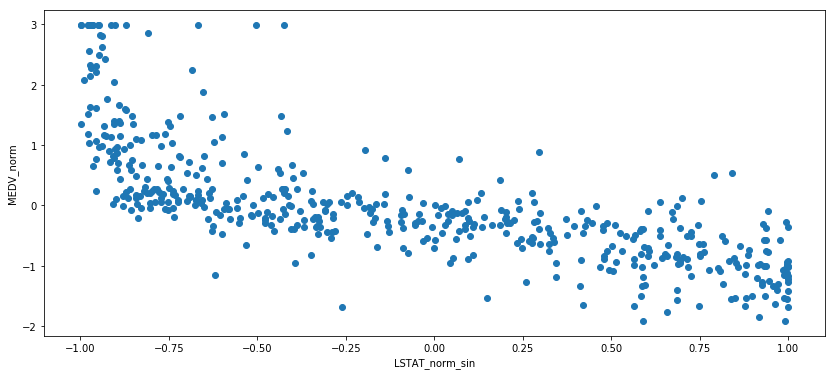

In [606]:
plot_vs_target(df, 'LSTAT_norm_sin', 'MEDV_norm')

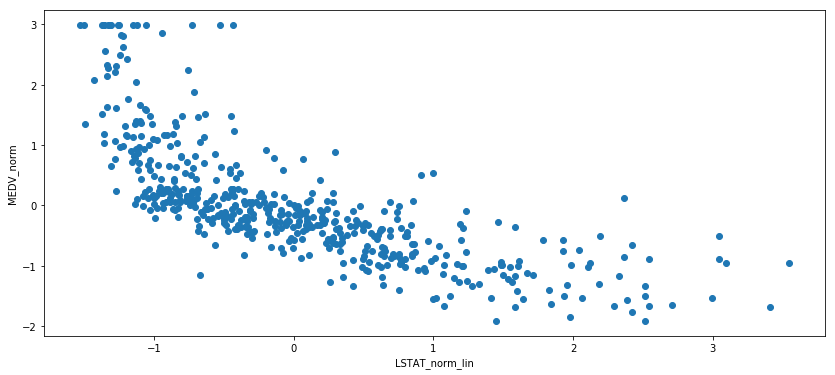

In [588]:
plot_vs_target(df, 'LSTAT_norm_lin', 'MEDV_norm')

<font size="4">
    
# Домашнее задание

* Реализовать алгоритм градиентного спуска для метода наименьших квадратов
  * Алгоритм должен принимать на вход массив значений float _количество примеров x количество признаков_ и вектор float размера _количество примеров_, начальный набор весов (из нормального распределения $\mathcal{N}(0, 1)$, learning rate (размер шага)
  * Написать функцию для кросс-валиации (деления данных на подвыборки, провеки)
  * Написать функцию для нормализации данных $\dfrac{x_i - \mu}{\sigma}$
  * Алгоритм должен показывать нормальные (близкие к тем, которые были на занятии) результаты на кросс-валидации, данные для обучения будут предоставлены, целевая колонка - MEDV
* Дополнительно 
  * Добавить в функцию ошибки bias (сдвиг)
  * Добавить функцию ошибки с l2 / l1  или Elastic Net 
  
</font>

<font size="4">

# Логистическая регрессия

## Классификация 


Классификацию лучше разибрать с вероятностной точки зрения. Мы разберем эту тему на примере бинарной классификации с классами $\{0, 1\}$. 

> Примеры задач?

## Постановка задачи
Есть случайная величина $y$ - метка класса $\{0, 1\}$; вектор случайных величин - признаков $\textbf{x}$. 
* Как интерпретировать $y_i$?
* Как по набору признаков $\textbf{x}_i$ восстановить $y_i$ с максимальной точностью?
* Как измерить точность? Какую функцию ошибки выбрать?
* Как применять регрессию к этой задаче?


## Ответы на вопросы

### Целевая величина и максимихация правдоподобия

$y_i = p(y_i|\textbf{x}_i)$ - вероятность того, что объект $\textbf{x}_i$  принадлежит к "положительному" классу (например, классу покупателей, купивших товар). Если человек _действительно_ купил товар, $p(y_i|\textbf{x}_i) = 1$, иначе $0$.

### Прогнозирование величины

Нужно прогнозировать вероятность (события). Значит, модель должна возвращать число в диапазоне $[0, 1]$ - речь идет о вероятности. Это первое ограничение, которое будет наложено на модель $f(\textbf{x}, \textbf{w})$

### Правдободобие

Правдоподобие - функция, которая показывает вероятность какого-то набора исходов при заданных параметрах модели. 

Простой пример правдоподобия: есть монета, броски монеты описываются случайной величиной $Y$. При этом неизвестно, "честная" ли монета, или она падает неравномерно. Броски независимы, исходы записываются в последовательность. Наблюдается последовательность бросков:

$HHHHHHHTHHTHH$

* Как оценить, насколько _правдоподобно_, что монета обладает определенными характеристиками (т.е. каков параметр $\theta$, описывающий вероятность выпадения $H$)?
* Каковы наиболее правдоподобные характеристики монеты?

.  
.  
.  
.  
.  
.  
.  
.  
.  
.  
.  
.  
.  
.  
.  
.  

$\textbf{y} = \{HHHHHHHTHHTHH\}$ - результаты эксперимента

$\mathcal{L}(\theta|\textbf{y}) = \prod_{i=1}^n p(Y=y_i|\theta)$ - вероятность данного набора исходов


Что нужно сделать? Найти максимум функции $\mathcal{L}(\theta|\textbf{y})$ ($= p(\textbf{y}|\theta)$).

Поиск максимума $\rightarrow$ поиск экстремума. У нас есть набор методов для того, чтобы решать подобные задачи - как минимум, аналитические решения и градиентный спуск. 

Поиск максимума называется (принципом) максимизацией правдоподобия.

**log-likelihood (логарифм правдоподобия)**

$\log{\mathcal{L}(\theta|\textbf{y})} = \log \prod_{i=1}^n p(Y=y_i|\theta) 
= \sum\limits_{i=1}^n \log{p(Y=y_i|\theta)}
$

Логарифм применяют, так как функция многие вероятностные распределения логарифмически выпусклые, а выпуклость функции нужна, чтобы найти "правильный" максимум при максимизации правдободобия.

### Обобщение

Немного обобщим. Представим, что речь идет не о монете, а о более сложной модели, которая вкючает вектор параметров $\theta$ и вектор переменных $textbf{x}$. Допустим, есть всего два исхода: $\{0, 1\}$ Вероятность исхоов можно записать так: 

$p(y_i=0| \textbf{x}_i, \theta)$

$p(y_i=1| \textbf{x}_i, \theta)$

Так как исходы взаимоисключающие, можно записать

$p(y_i=0| \textbf{x}_i, \theta) = 1 - p(y_i=1| \textbf{x}_i, \theta)$

Теперь давайте скажем, что функция $f(\textbf{x}_i, \theta) = p(y_i=1| \textbf{x}_i, \theta)$ - это _модель_, которая прогнозирует вероятность того, что будет "положительный" случайный исход.

### Моделирование случайного процесса

### logit




</font>

In [608]:
boston[[c for c in boston.columns if not c.endswith('norm')]].to_csv('boston_housing.csv')

In [609]:
boston[[c for c in boston.columns if not c.endswith('norm')]]

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,394.12,5.21,28.7
6,0.08829,12.5,7.87,0.0,0.524,6.012,66.6,5.5605,5.0,311.0,15.2,395.60,12.43,22.9
7,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5.0,311.0,15.2,396.90,19.15,27.1
8,0.21124,12.5,7.87,0.0,0.524,5.631,100.0,6.0821,5.0,311.0,15.2,386.63,29.93,16.5
9,0.17004,12.5,7.87,0.0,0.524,6.004,85.9,6.5921,5.0,311.0,15.2,386.71,17.10,18.9


In [590]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_boston
import numpy as np

from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

import warnings

def warn(*args, **kwargs):
    pass

warnings.warn = warn

boston_dataset = load_boston()

x = np.linspace(-5,5,100)
y = 2*x+1
plt.plot(x, y, '-r', label='y=2x+1')

%matplotlib inline

boston = pd.DataFrame(boston_dataset.data, columns=boston_dataset.feature_names)
boston.head()

boston['MEDV'] = boston_dataset.target


def plot_vs_target(boston, col, target='MEDV'):
    plt.figure(figsize=(14, 6))
    plt.scatter(boston[col], boston[target])
    plt.xlabel(col)
    plt.ylabel(target)

boston['RM_norm'] = ((boston['RM'] - boston['RM'].mean()) / (boston['RM'].std()))
boston['MEDV_norm'] = ((boston['MEDV'] - boston['MEDV'].mean()) / (boston['MEDV'].std()))


def plot_line(boston, col, target='MEDV'):
    yx_sum = (boston[target] * boston[target]).sum()
    xx_sum = (boston[col] * boston[col]).sum()
    w = yx_sum / xx_sum
    
    plt.figure(figsize=(14, 6))
    plt.scatter(boston[col], boston[target])
    plt.xlabel(col)
    plt.ylabel(target)
    
    x = np.linspace(boston[col].min(), boston[col].max(), 100)
    y = w*x
    
    plt.plot(x, y, '-r', label=f'y={w}x')
    
    
def plot_line_original_data(boston, col, target='MEDV'):
    yx_sum = (boston[target] * boston[target]).sum()
    xx_sum = (boston[col] * boston[col]).sum()
    w = yx_sum / xx_sum
    
    sy = boston[target.split('_')[0]].std()
    sx = boston[col.split('_')[0]].std()
    my = boston[target.split('_')[0]].mean()
    mx = boston[col.split('_')[0]].mean()
    
    plt.figure(figsize=(14, 6))
    plt.scatter(boston[col.split('_')[0]], boston[target.split('_')[0]])
    plt.xlabel(col)
    plt.ylabel(target)
    
    x = np.linspace(boston[col.split('_')[0]].min(), boston[col.split('_')[0]].max(), 100)
    
    b = my - w * sy * mx / sx 
    ww = sy / sx * w
    y = ww * x + b
    
    print(f"b = {b}, w = {ww}")
        
    plt.plot(x, y, '-r', label=f'y={ww}x + {b}')
        

def plot_potential(boston, fn, col, target='MEDV'):
    y = boston[target]
    x = boston[col]
    values = []
    w_s = np.linspace(-2., 3.5, 100)
    for w in w_s:
        values.append(sum((y - fn(x, w))**2))
    
    plt.figure(figsize=(14, 6))
    plt.xlabel('w')
    plt.ylabel('loss')

    plt.plot(w_s, values, '-r', label=f'(y - f(w, x))^2')
    

def fit_cv(data, Model=lambda: LinearRegression(fit_intercept=False)):
    models = []
    errs = [] 
    for i in range(len(data)):
        model = Model()
        model.fit(np.array([pd.concat((data['RM_norm'].iloc[:i], data['RM_norm'].iloc[i+1:]))]).T,
                  pd.concat((data['MEDV_norm'].iloc[:i], data['MEDV_norm'].iloc[i+1:])))
        
        err = mean_squared_error([data['MEDV_norm'].iloc[i]],
                                       model.predict(np.array([[data['RM_norm'].iloc[i]]]).T))
        
        errs.append(err)
        models.append(model)
        
    col = 'RM_norm'
    target = 'MEDV_norm'
    plt.figure(figsize=(14, 6))
    plt.scatter(boston[col], boston[target])
    plt.xlabel(col)
    plt.ylabel(target)
    
    x = np.linspace(data[col].min(), data[col].max(), 100)
    weights_mean = np.mean([m.coef_ for m in models], axis=0)
    y = [sum([w * i**pw for w, pw in zip(weights_mean, range(1, 2))]) for i in x]
    
    plt.plot(x, y, '-r', label=f'y={w}x')
        
    print(f"MSE\n cv={np.mean(errs)}")
    print(f"Weights:\n {weights_mean}")

    return models, np.mean(errs)


def overfit_cv(data, terms, Model=lambda: LinearRegression(fit_intercept=False)):
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 8))
    terms = list(terms)
    def to_polynomial(x):
        return np.array([x**i for i in terms]).T
    
    models = []
    errs = [] 
    errs_tr = []
    for i in range(len(data)):
        model = Model()
        
        x_tr = to_polynomial(pd.concat((data['RM_norm'].iloc[:i], data['RM_norm'].iloc[i+1:])))
        y_tr = pd.concat((data['MEDV_norm'].iloc[:i], data['MEDV_norm'].iloc[i+1:]))
        
        model.fit(x_tr, y_tr)
        
        err = mean_squared_error([data['MEDV_norm'].iloc[i]],
                                 model.predict(to_polynomial(np.array([data['RM_norm'].iloc[i]]))))
        
        err_tr = mean_squared_error(y_tr, model.predict(x_tr))
        
        errs.append(err)
        errs_tr.append(err_tr)
        models.append(model)

    col = 'RM_norm'
    target = 'MEDV_norm'
    # axes[0].figure(figsize=(7, 6))
    axes[0].scatter(boston[col], boston[target])
    axes[0].set_xlabel(col)
    axes[0].set_ylabel(target)
    
    x = np.linspace(data[col].min(), data[col].max(), 100)
    weights_mean = np.mean([m.coef_ for m in models], axis=0)
    y = [sum([w * i**pw for w, pw in zip(weights_mean, terms)]) for i in x]
    
    axes[0].plot(x, y, '-r', label=f'y={w}x')
        
    
    print(f"MSE\n cv train={np.mean(errs_tr)}, cv test={np.mean(errs)}")
    axes[1].bar(range(len(terms)), weights_mean, tick_label=terms)

    return models, np.mean(errs)


boston_train, boston_test = train_test_split(boston, test_size=0.3)


def fit_model(data, term_names, Model=lambda: LinearRegression(fit_intercept=False)):
    fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(16, 8))

    target = data['MEDV_norm']
    data = data.iloc[:, data.columns != 'MEDV_norm']
    
    models = []
    errs = [] 
    errs_tr = []
    for i in range(len(data)):
        model = Model()
        x_tr = pd.concat((data.iloc[:i], data.iloc[i+1:]))
        y_tr = pd.concat((target.iloc[:i], target.iloc[i+1:]))
        model.fit(x_tr, y_tr)
        
        err = mean_squared_error([target.iloc[i]],
                                       model.predict([data.iloc[i]]))
        err_tr = mean_squared_error(y_tr, model.predict(x_tr))

        
        errs.append(err)
        errs_tr.append(err_tr)
        models.append(model)

    weights_mean = np.mean([m.coef_ for m in models], axis=0)
            
    print(f"MSE\n cv train={np.mean(errs_tr)}, cv test={np.mean(errs)}")
    
    axes.bar(range(len(term_names)), weights_mean, tick_label=term_names)
    
    for tick in axes.get_xticklabels():
        tick.set_rotation(45)


    return models, np.mean(errs), {k: w for k, w in zip(term_names, weights_mean)}


def generate_features(data, feature_cols, terms, term_names):
    values = list()
    cols = list()
    for col in feature_cols:
        mean = data[col].mean() 
        std = data[col].std()
        data[col + '_norm'] = (data[col] - mean) / std
        for term, name in zip(terms, term_names):
            values.append(term(data[col + '_norm']))
            cols.append(col + '_norm_' + name)
            
    return pd.DataFrame({col: val for col, val in zip(cols, values)}).fillna(0)